In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 

{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [4]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [5]:
y.head()

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [6]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [29]:
def mean_squared_error(y_true, y_pred):

    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    n = len(y_true)
    mse = np.sum((y_true - y_pred) ** 2) / n
    return mse

def r2_score(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    ss_res = np.sum((y_true - y_pred) ** 2) 
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [30]:
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 95.6172
R² Score: 0.6370


In [ ]:
y_test_array = y_test.values.ravel()
y_pred_array = y_pred  

y_min, y_max = np.min(y_test_array), np.max(y_test_array)

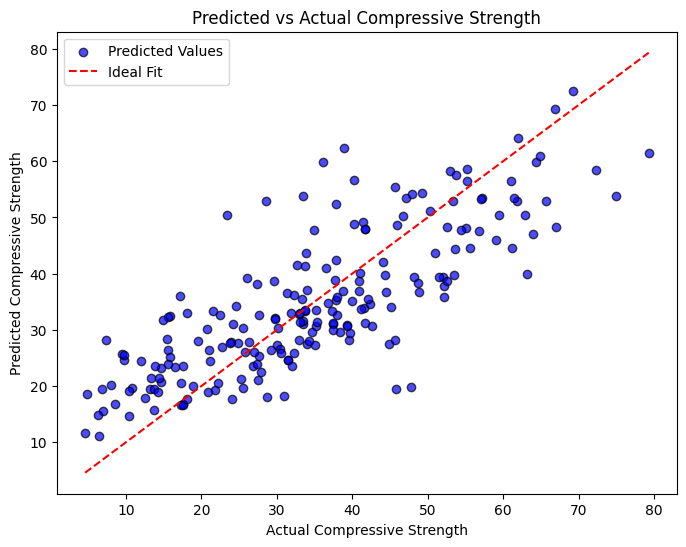

In [32]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.7, color="blue", edgecolors="black", label="Predicted Values")

plt.plot([y_min, y_max], [y_min, y_max], linestyle="--", color="red", label="Ideal Fit")


plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Predicted vs Actual Compressive Strength")
plt.legend()

plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures

Degree 2: MSE = 62.2923, R² = 0.7635


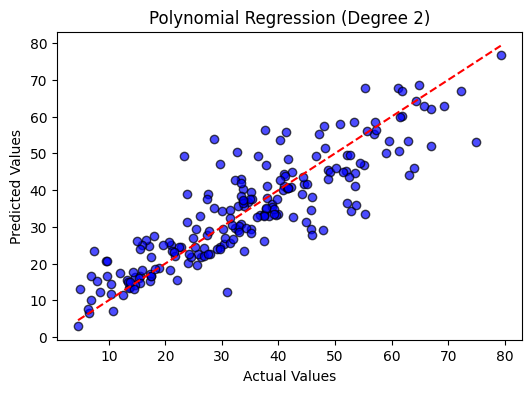

Degree 3: MSE = 51.1225, R² = 0.8059


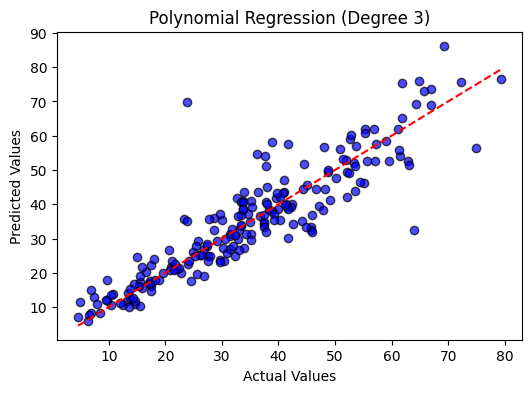

Degree 4: MSE = 4460.5801, R² = -15.9359


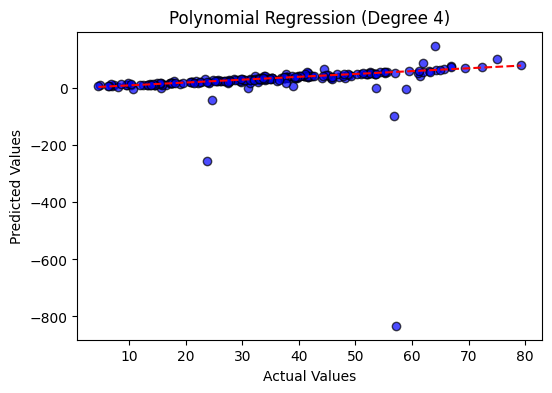

In [34]:
degrees = [2, 3, 4]  
predictions = {}

for k in degrees:
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    predictions[f"y_pred_poly_{k}"] = model.predict(X_test_poly) 

    mse = mean_squared_error(y_test, predictions[f"y_pred_poly_{k}"])
    r2 = r2_score(y_test, predictions[f"y_pred_poly_{k}"])
    
    print(f"Degree {k}: MSE = {mse:.4f}, R² = {r2:.4f}")

    # Convert y_test to array
    y_test_array = y_test.values.ravel()
    y_pred_array = predictions[f"y_pred_poly_{k}"]

    y_min, y_max = np.min(y_test_array), np.max(y_test_array)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, predictions[f"y_pred_poly_{k}"], alpha=0.7, color="blue", edgecolors="black", label="Predicted Values")
    plt.plot([y_min, y_max], [y_min, y_max], linestyle="--", color="red", label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Polynomial Regression (Degree {k})")
    plt.show()


In [ ]:
#R^2 for degree k= 4 is negative which means the model is worse than simply predicting the mean of 𝑦 for all inputs.
#The model is overfitting the training data.

It is very complicated to plot all the 8 variable and then one target variable on a 9-D map. So, in order to plot the entire data and then overlay my prohjections over it, I plan to user pairwise plots of each variable with the taregt variable. This seems the most sensible choice to me.

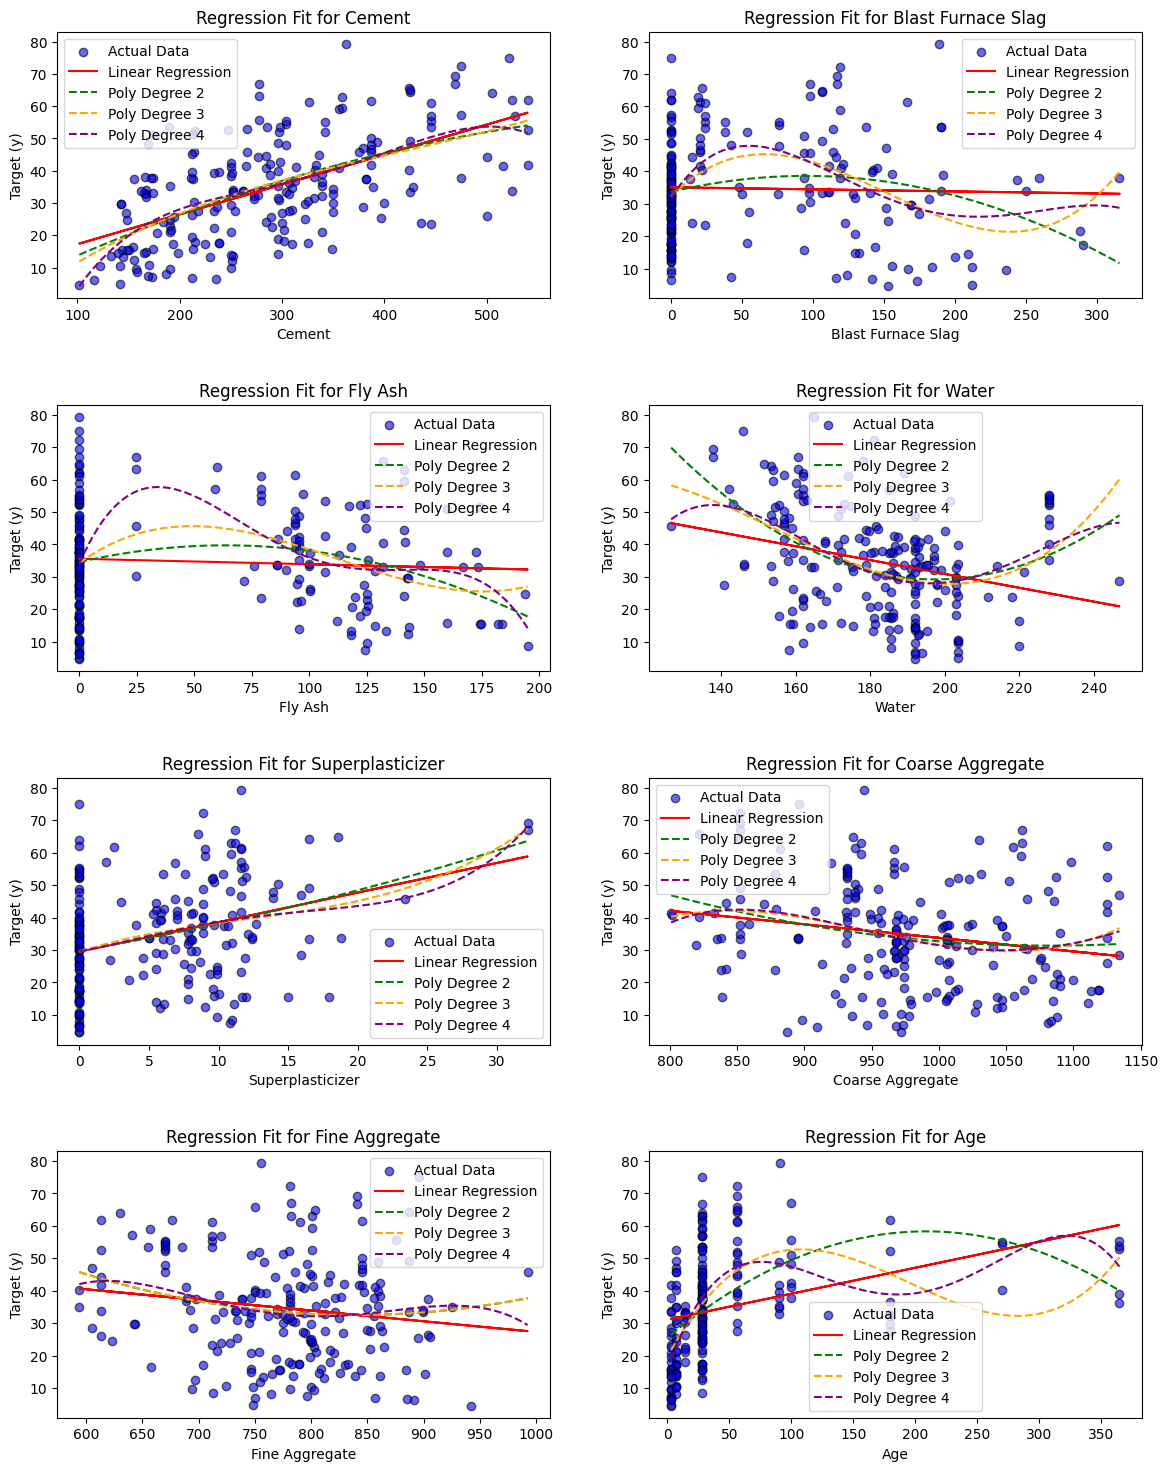

In [35]:
y_test_array = y_test.values.ravel()

# Set up the plot grid for pairwise visualization
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))  
fig.subplots_adjust(hspace=0.4)  

degrees = [2, 3, 4]
colors = ["green", "orange", "purple"]

for idx, feature in enumerate(X_test.columns):
    row, col = divmod(idx, 2)  
    ax = axes[row, col]
    
    X_feature = X_test[[feature]].values  
    
    ax.scatter(X_feature, y_test_array, alpha=0.6, color="blue", label="Actual Data", edgecolors="black")
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_feature, y_test_array)
    y_pred_lin = lin_reg.predict(X_feature)
    ax.plot(X_feature, y_pred_lin, color="red", label="Linear Regression")

    X_grid = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)  

    for k, color in zip(degrees, colors):
        poly = PolynomialFeatures(degree=k)
        X_feature_poly = poly.fit_transform(X_feature)
        X_grid_poly = poly.transform(X_grid)

        poly_reg = LinearRegression()
        poly_reg.fit(X_feature_poly, y_test_array)
        y_pred_poly = poly_reg.predict(X_grid_poly)  
        
        ax.plot(X_grid, y_pred_poly, color=color, linestyle="--", label=f"Poly Degree {k}")


    ax.set_xlabel(feature)
    ax.set_ylabel("Target (y)")
    ax.set_title(f"Regression Fit for {feature}")
    ax.legend()


plt.show()


In [36]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (206, 8)
y_test shape: (206, 1)


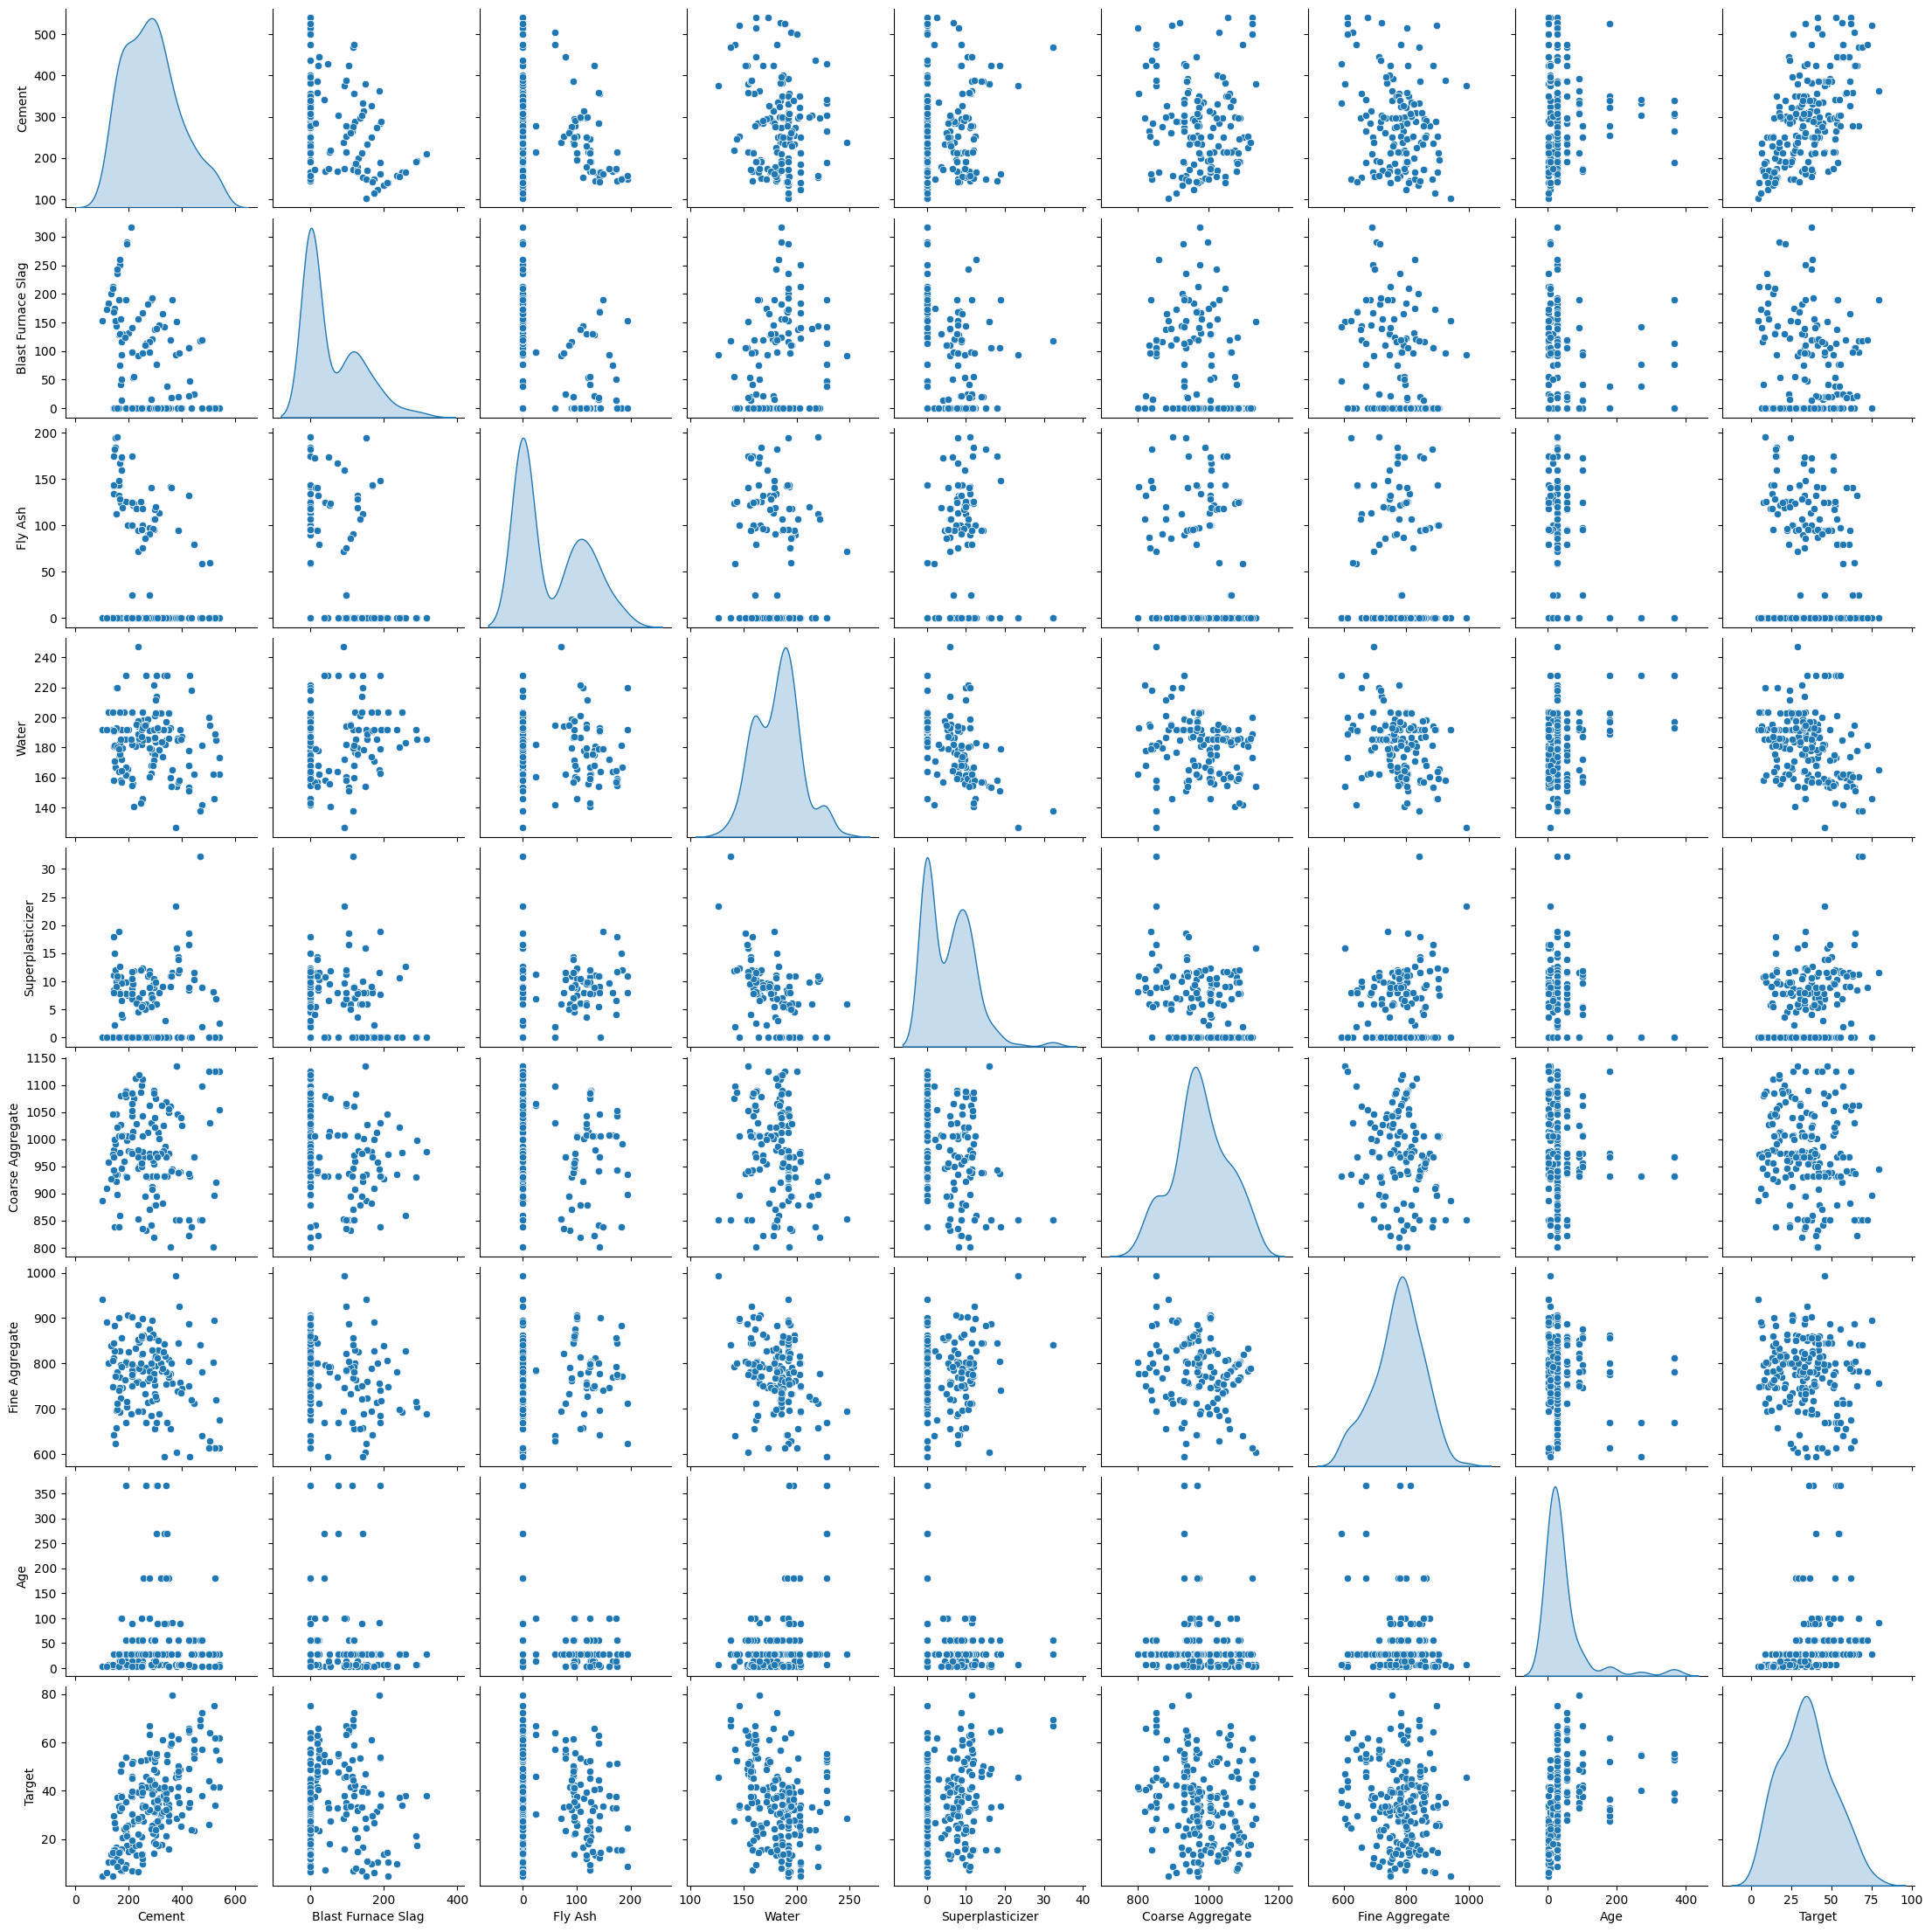

In [37]:
import seaborn as sns

df_test = X_test.copy()
df_test["Target"] = y_test

sns.pairplot(df_test, diag_kind='kde')
plt.show()


                   Model  Degree          MSE         R²
0      Linear Regression       1    95.617174   0.636961
1  Polynomial Regression       2    62.292321   0.763488
2  Polynomial Regression       3    51.122499   0.805898
3  Polynomial Regression       4  4460.580083 -15.935933


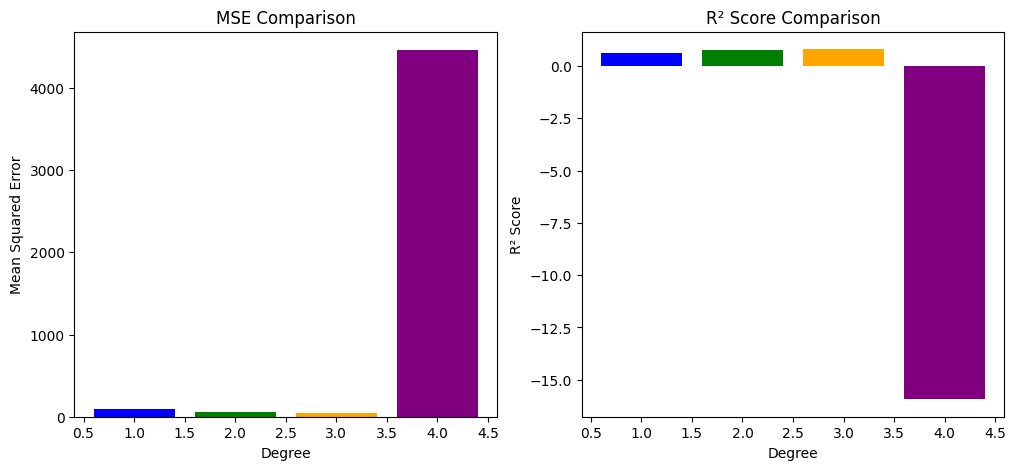

In [38]:
results = {"Model": [], "Degree": [], "MSE": [], "R²": []}

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

results["Model"].append("Linear Regression")
results["Degree"].append(1) 
results["MSE"].append(mse_lin)
results["R²"].append(r2_lin)

degrees = [2, 3, 4]

for k in degrees:
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    y_pred_poly = poly_reg.predict(X_test_poly)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    results["Model"].append(f"Polynomial Regression")
    results["Degree"].append(k)
    results["MSE"].append(mse_poly)
    results["R²"].append(r2_poly)

results_df = pd.DataFrame(results)

print(results_df)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot MSE
ax[0].bar(results_df["Degree"], results_df["MSE"], color=["blue", "green", "orange", "purple"])
ax[0].set_title("MSE Comparison")
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Mean Squared Error")

# Plot R²
ax[1].bar(results_df["Degree"], results_df["R²"], color=["blue", "green", "orange", "purple"])
ax[1].set_title("R² Score Comparison")
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("R² Score")

plt.show()

Bias Variance Tradeoff : In simple terms, it helps us explain how increasing the complexity of a model affects its predcitive performance

The Linear Regression model has high bias as it is too simple to capture the complexity of the data. It has low variance and is stabel across across different datasets but lacks flexibility. If the relationship between features and target is nonlinear, linear regression may underfit.

Poly Regression(Degree = 4) has low bias as it fits the data prettuy well but has very high variance as it is too sensitive to even the small fluctuations in the data. This also leads to over fitting. It performs very well on training data but generalizes poorly to unseen data, resulting in negative R².

Both Poly Regression(Degree = 3) and (Degree = 2) have moderate bias and variance. But due to low MSE and R^2 close to 1, Poly Regression(Degree = 3) would be the optimal choice here.




Higher order poly. tends to overfit the data as they capture more noise rather than just the true underlying pattern. The regression curve becomes too flexible, adjusting to every small variation in the training data. The model’s variance increases drastically. Thi smeans that it will perfevtly fit the traing data but will perform very porrly on the test data.